In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [3]:
models = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    SVR(),
    LinearRegression()
]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
def test_model(df, models, target):
    X = df.drop([target], axis=1).values
    y = df[target].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    mse, mae, mse_normalized, mae_normalized = {}, {}, {}, {}
    scaler = StandardScaler()
    
    for i in range(len(models)):
        models[i].fit(X_train, y_train)
        y_pred = models[i].predict(X_test)
        
        mae[str(models[i].__class__())] = mean_absolute_error(y_pred, y_test)
        mse[str(models[i].__class__())] = mean_squared_error(y_pred, y_test)
        
        X_train_norm = scaler.fit_transform(X_train)
        X_test_norm = scaler.transform(X_test)
        
        models[i].fit(X_train_norm, y_train)
        y_pred = models[i].predict(X_test_norm)
        
        mse_normalized[str(models[i].__class__())] = mean_squared_error(y_pred, y_test)
        mae_normalized[str(models[i].__class__())] = mean_absolute_error(y_pred, y_test)
    
    return mae, mse, mae_normalized, mse_normalized

In [7]:
df_init = pd.read_csv('innitial.csv')
df_selected = pd.read_csv('selected.csv')

In [8]:
mae, mse, mae_normalized, mse_normalized = test_model(df_init, models, 'rating_score')

In [9]:
mae

{'KNeighborsRegressor()': 0.7567351293678314,
 'DecisionTreeRegressor()': 0.9069688585665334,
 'ExtraTreeRegressor()': 0.9215005003487754,
 'SVR()': 0.7118137108677773,
 'LinearRegression()': 0.7416181792623803}

In [10]:
mse

{'KNeighborsRegressor()': 0.9155934915977595,
 'DecisionTreeRegressor()': 1.5111170075593272,
 'ExtraTreeRegressor()': 1.5589155893030187,
 'SVR()': 0.8795294819284701,
 'LinearRegression()': 0.8324234592323836}

In [11]:
mae_normalized

{'KNeighborsRegressor()': 0.7573486263003468,
 'DecisionTreeRegressor()': 0.907991353454059,
 'ExtraTreeRegressor()': 0.9164405074386892,
 'SVR()': 0.7075277352645712,
 'LinearRegression()': 0.7416181792623809}

In [12]:
mse_normalized

{'KNeighborsRegressor()': 0.9193758335556148,
 'DecisionTreeRegressor()': 1.5194306319332345,
 'ExtraTreeRegressor()': 1.5405310231525373,
 'SVR()': 0.8577404362407374,
 'LinearRegression()': 0.8324234592323838}

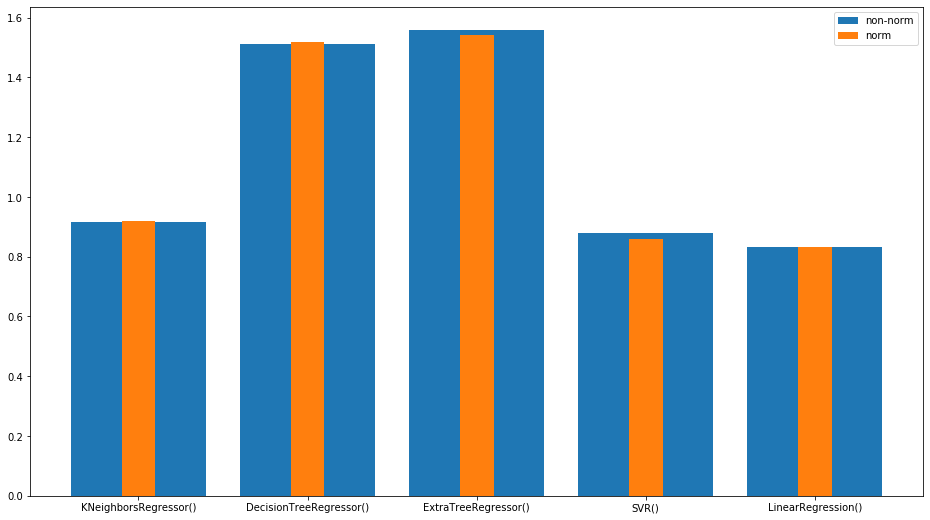

In [15]:
plt.figure(figsize=(16, 9))
plt.bar(mse.keys(), mse.values(), label='non-norm')
plt.bar(mse_normalized.keys(), mse_normalized.values(), width=0.2, label='norm')
plt.legend()

In [16]:
mae, mse, mae_normalized, mse_normalized = test_model(df_selected, models, 'rating_score')

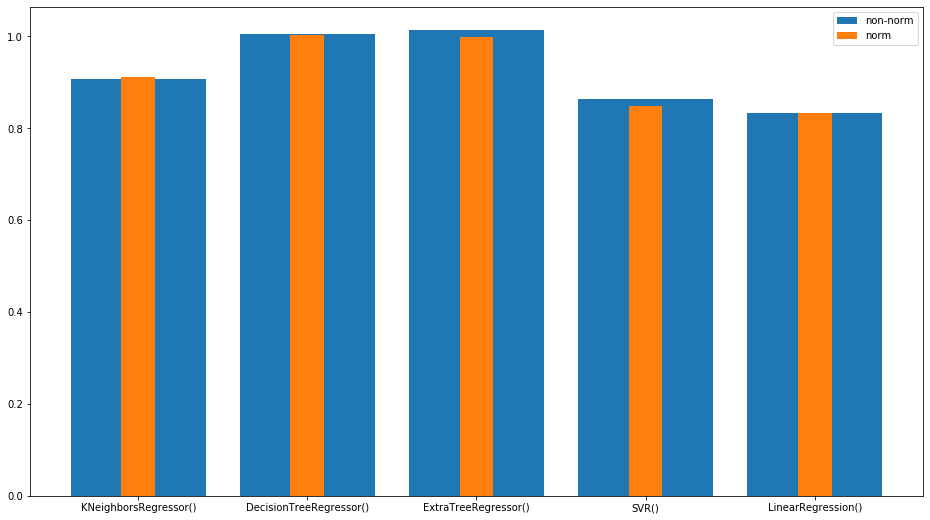

In [17]:
plt.figure(figsize=(16, 9))
plt.bar(mse.keys(), mse.values(), label='non-norm')
plt.bar(mse_normalized.keys(), mse_normalized.values(), width=0.2, label='norm')
plt.legend()

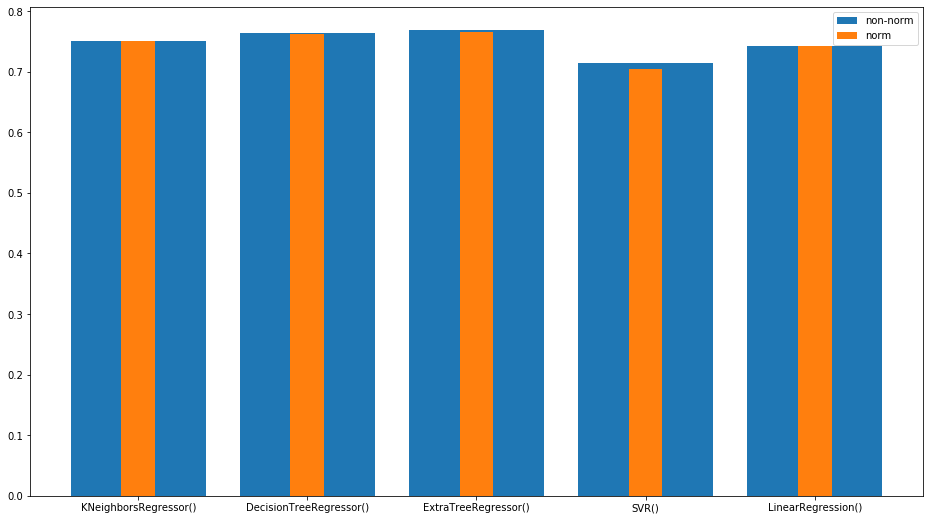

In [18]:
plt.figure(figsize=(16, 9))
plt.bar(mse.keys(), mse.values(), label='non-norm')
plt.bar(mse_normalized.keys(), mse_normalized.values(), width=0.2, label='norm')
plt.legend()

In [19]:
mse

{'KNeighborsRegressor()': 0.9064817284609229,
 'DecisionTreeRegressor()': 1.0042655079223268,
 'ExtraTreeRegressor()': 1.0131115521195515,
 'SVR()': 0.8632576403188827,
 'LinearRegression()': 0.8322757183960529}

In [20]:
mae

{'KNeighborsRegressor()': 0.7501733795678848,
 'DecisionTreeRegressor()': 0.7636779834183032,
 'ExtraTreeRegressor()': 0.76881684628515,
 'SVR()': 0.7137977978593515,
 'LinearRegression()': 0.7416929966108439}

In [21]:
mae_normalized

{'KNeighborsRegressor()': 0.7504934649239798,
 'DecisionTreeRegressor()': 0.7624690145619618,
 'ExtraTreeRegressor()': 0.7648044075256485,
 'SVR()': 0.7040241093498103,
 'LinearRegression()': 0.741692996610844}

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('linear_model', LinearRegression())
    ]
)

In [24]:
X = df_selected.drop(['rating_score'], axis = 1).values
y = df_selected['rating_score'].values

In [25]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

In [26]:
import pickle

In [27]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [28]:
df_selected

,critic_likes,critic_comments,movie_release_year,movie_popularity,avg_list_comments,rating_score
0,0,0,2005.0,1.0,1.923077,2.0
1,0,0,2005.0,1.0,0.416667,2.0
2,0,0,2005.0,1.0,0.200000,3.0
3,0,0,2005.0,1.0,0.166667,3.0
4,0,0,2005.0,1.0,0.466667,4.0
...,...,...,...,...,...,...
29986,0,0,1957.0,9.0,0.000000,1.0
29987,0,0,1957.0,9.0,0.000000,4.0
29988,0,0,1957.0,9.0,0.000000,2.0
29989,0,0,1957.0,9.0,0.000000,2.0


In [30]:
pipe['linear_model'].coef_

array([ 0.0837054 , -0.0373423 , -0.10074845,  0.22092385, -0.02189592])

In [31]:
coef_names = list(df_selected.iloc[:, :-1].columns)
coef_values = list(pipe['linear_model'].coef_)

<BarContainer object of 5 artists>

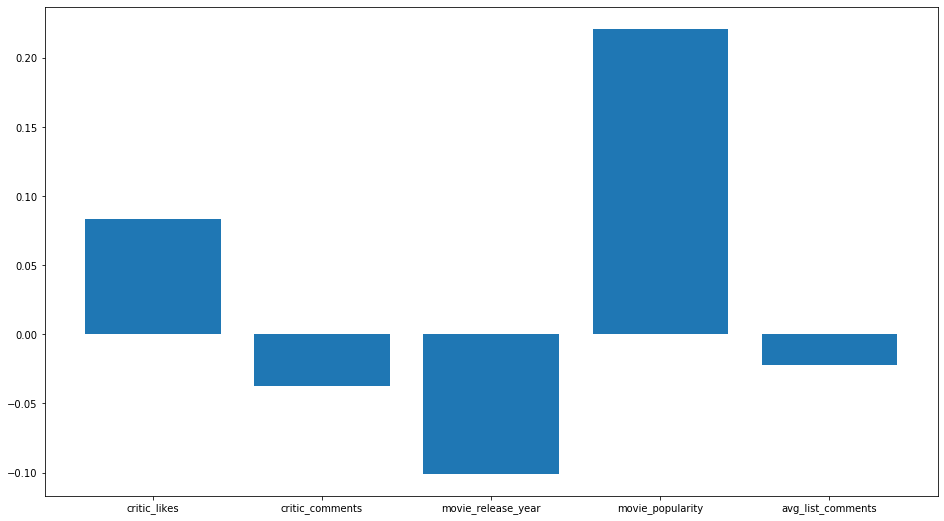

In [32]:
plt.figure(figsize=(16, 9))
plt.bar(coef_names, coef_values)